In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [3]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [4]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [5]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [6]:
test_y = data_test.iloc[:, 0] 

In [7]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [8]:
test_X = data_test.iloc[:, 1:] 

test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [9]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

In [ ]:
# max_depth
# num_leaves

In [10]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for grid search (modify as needed)
param_grid = {
    'max_depth': range(2, 7, 1),
    'num_leaves': range(5, 60, 2)
}

lgbm = lgb.LGBMClassifier(random_state=123, verbose=-1)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(train_X, train_y)

best_lgbm = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

cv_scores = cross_val_score(best_lgbm, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'max_depth': 2, 'num_leaves': 5}
Cross-validation accuracy scores:  [0.85294118 0.73529412 0.79411765 0.75757576 0.72727273 0.78787879
 0.87878788 0.81818182 0.90909091 0.87878788]
Mean cross-validation accuracy:  0.8139928698752227


In [ ]:
# min_data_in_leaf  
# A larger min_data_in_leaf value can prevent the tree from splitting too deeply, thereby reducing the risk of overfitting.
# max_bin

In [11]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for grid search (modify as needed)
param_grid = {
    'max_bin': range(3, 35, 3),
    'min_data_in_leaf': range(30, 80, 5)
}

lgbm = lgb.LGBMClassifier(random_state=123, verbose=-1,max_depth=2, num_leaves=5)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(train_X, train_y)

best_lgbm = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

cv_scores = cross_val_score(best_lgbm, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'max_bin': 24, 'min_data_in_leaf': 65}
Cross-validation accuracy scores:  [0.85294118 0.76470588 0.82352941 0.75757576 0.81818182 0.84848485
 0.84848485 0.81818182 0.96969697 0.87878788]
Mean cross-validation accuracy:  0.8380570409982175


In [ ]:
# Feature_fraction_range = [0.6, 0.7, 0.8, 0.9, 1.0]
# Bagging_fraction_range = [0.6, 0.7, 0.8, 0.9, 1.0]
# Bagging_freq_range = range(0, 40,5)


In [12]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score


# Initialize the LGBMClassifier with the best parameters found
lgbm = lgb.LGBMClassifier(random_state=123, verbose=-1, max_depth=2, num_leaves=5,max_bin=24,min_data_in_leaf=65)

# Define the new parameter grid for grid search
param_grid = {
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_freq': range(0, 40, 5)
}

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(train_X, train_y)

# Get the best estimator
best_lgbm = grid_search.best_estimator_

# Print the best parameters found in the second grid search
print("Best parameters found: ", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_scores = cross_val_score(best_lgbm, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'bagging_fraction': 0.6, 'bagging_freq': 0, 'feature_fraction': 0.9}
Cross-validation accuracy scores:  [0.85294118 0.76470588 0.82352941 0.75757576 0.81818182 0.84848485
 0.84848485 0.81818182 0.96969697 0.87878788]
Mean cross-validation accuracy:  0.8380570409982175


In [ ]:
# lambda_l1
#  lambda_l2

In [13]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score

# Second parameter grid search results
best_params= {'bagging_fraction': 0.6, 'bagging_freq': 0, 'feature_fraction': 0.9}

# Initialize the LGBMClassifier with the best parameters found
lgbm = lgb.LGBMClassifier(random_state=123, verbose=-1, max_depth=2, num_leaves=5, max_bin=24, min_data_in_leaf=65, **best_params)

# Define the new parameter grid for grid search
param_grid = {
    'lambda_l1': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'lambda_l2': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(train_X, train_y)

# Get the best estimator
best_lgbm = grid_search.best_estimator_

# Print the best parameters found in the third grid search
print("Best parameters found: ", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_scores = cross_val_score(best_lgbm, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'lambda_l1': 1e-05, 'lambda_l2': 1e-05}
Cross-validation accuracy scores:  [0.85294118 0.76470588 0.82352941 0.75757576 0.81818182 0.84848485
 0.84848485 0.81818182 0.96969697 0.87878788]
Mean cross-validation accuracy:  0.8380570409982175


In [ ]:
#  'learning_rate'
#  'n_estimators'

In [15]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score

# Third parameter grid search results
best_params = {
    'bagging_fraction': 0.6, 
    'bagging_freq': 0, 
    'feature_fraction': 0.9, 
    'lambda_l1': 1e-05, 
    'lambda_l2': 1e-05
}

# Initialize the LGBMClassifier with the best parameters found
lgbm = lgb.LGBMClassifier(random_state=123, verbose=-1, max_depth=2, num_leaves=5, max_bin=24, min_data_in_leaf=65, **best_params)

# Define the new parameter grid for grid search
param_grid = {
    'learning_rate': [0.001, 0.005,0.01],
    'n_estimators': [450,500,550,600,650,700]
}

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(train_X, train_y)

# Get the best estimator
best_lgbm = grid_search.best_estimator_

# Print the best parameters found in the fourth grid search
print("Best parameters found: ", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_scores = cross_val_score(best_lgbm, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())


Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 650}
Cross-validation accuracy scores:  [0.85294118 0.79411765 0.82352941 0.75757576 0.81818182 0.81818182
 0.84848485 0.81818182 0.96969697 0.87878788]
Mean cross-validation accuracy:  0.8379679144385026


In [16]:
from sklearn.metrics import roc_auc_score
best_lgbm.fit(train_X, train_y)

# Predict probabilities for the training and testing sets
train_probs = best_lgbm.predict_proba(train_X)[:, 1]
test_probs = best_lgbm.predict_proba(test_X)[:, 1]

# Calculate AUC scores for training and testing sets
train_auc = roc_auc_score(train_y, train_probs)
test_auc = roc_auc_score(test_y, test_probs)

# Print the AUC scores
print("Training AUC: ", train_auc)
print("Testing AUC: ", test_auc)

Training AUC:  0.9190622485553361
Testing AUC:  0.8883582089552239


In [17]:
clf_1_list = [
    (best_lgbm, "lgbm")
]

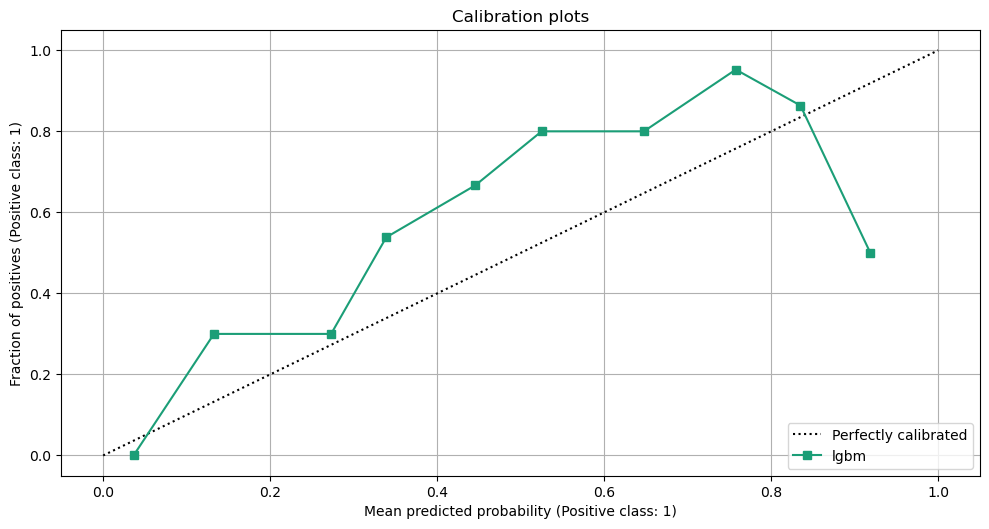

In [18]:
np.random.seed(321)
random.seed(321)

# Create the canvas and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create the subplot for the calibration curve
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are both lists of (classifier, name) tuples

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Show the plot


In [ ]:
#..........

In [ ]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [42]:
import lightgbm as lgb


params_LGBM = {
    'lambda_l1': 0.7,
    'lambda_l2': 1e-05,
    'learning_rate': 0.005,
    'n_estimators': 600,
    'max_depth': 4,
    'num_leaves': 12,
    'max_bin': 14,
    'min_data_in_leaf': 32,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.6,
    'bagging_freq': 10,
    'random_state': 123,
    'verbose': -1
}

best_LGBM = lgb.LGBMClassifier(**params_LGBM)


best_LGBM.fit(train_X, train_y)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=123, verbose=-1)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
train_y_pred = best_LGBM.predict(train_X)
train_accuracy = accuracy_score(train_y, train_y_pred)
print("Training Accuracy:", train_accuracy)
train_y_prob = best_LGBM.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

Training Accuracy: 0.8378378378378378
Training AUC： 0.9172701338599956


In [44]:
y_score_LGBM = best_LGBM.predict_proba(test_X)[:, 1]
LGBM_y_pred=best_LGBM.predict(test_X)
test_accuracy = accuracy_score(test_y, LGBM_y_pred)
print("Test_accuracy:", test_accuracy)
fpr3, tpr3, threshold = roc_curve(test_y, y_score_LGBM)

# Calculate AUC
auc_value = auc(fpr3, tpr3)
print("Test AUC:", auc_value)

Test_accuracy: 0.823943661971831
Test AUC: 0.8920398009950249


In [45]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [46]:
# Calculate various metrics for the training and test sets
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y, train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y, LGBM_y_pred)

# Print the results
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.3f}")
print(f"Specificity: {specificity_train:.3f}")
print(f"PPV (Precision): {ppv_train:.3f}")
print(f"NPV: {npv_train:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.3f}")
print(f"MCC: {mcc_train:.3f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.3f}")
print(f"Specificity: {specificity_test:.3f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.3f}")
print(f"MCC: {mcc_test:.3f}")



Train Set Metrics:
Sensitivity: 0.823
Specificity: 0.849
PPV (Precision): 0.812
NPV: 0.859
Predictive Accuracy: 0.838
MCC: 0.672

Test Set Metrics:
Sensitivity: 0.776
Specificity: 0.867
PPV (Precision): 0.839
NPV: 0.812
Predictive Accuracy: 0.824
MCC: 0.647


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.utils import resample

In [48]:
fpr_train, tpr_train, thresholds_train = roc_curve(train_y, train_y_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(test_y, y_score_LGBM)

In [49]:
n_bootstraps = 1000
auc_scores_train = []
auc_scores_test = []

for i in range(n_bootstraps):
    # Perform bootstrap sampling on the training set
    train_y_sampled, train_y_prob_sampled = resample(train_y, train_y_prob)
    
    # Calculate the AUC for the sampled training set
    auc_scores_train.append(roc_auc_score(train_y_sampled, train_y_prob_sampled))
    
    # Perform bootstrap sampling on the validation set
    test_y_sampled, y_score_LGBM_sampled = resample(test_y, y_score_LGBM)
    
    # Calculate the AUC for the sampled validation set
    auc_scores_test.append(roc_auc_score(test_y_sampled, y_score_LGBM_sampled))

lower_bound_train = np.percentile(auc_scores_train, 2.5)
upper_bound_train = np.percentile(auc_scores_train, 97.5)
lower_bound_test = np.percentile(auc_scores_test, 2.5)
upper_bound_test = np.percentile(auc_scores_test, 97.5)

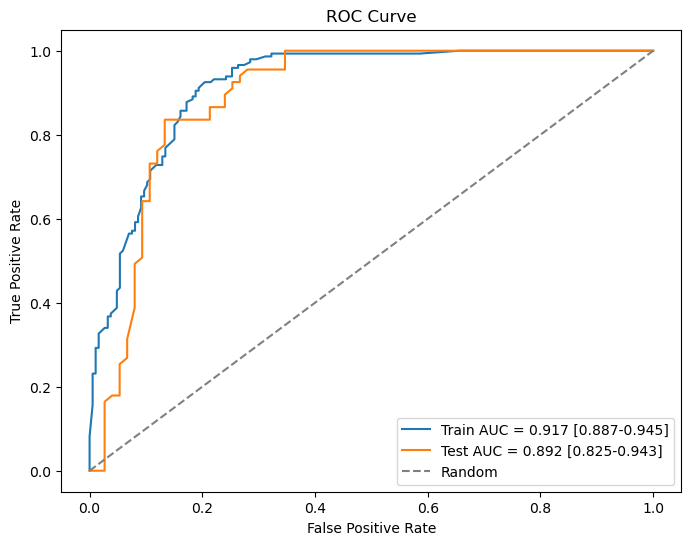

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.3f} [{lower_bound_train:.3f}-{upper_bound_train:.3f}]')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_value:.3f} [{lower_bound_test:.3f}-{upper_bound_test:.3f}]')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

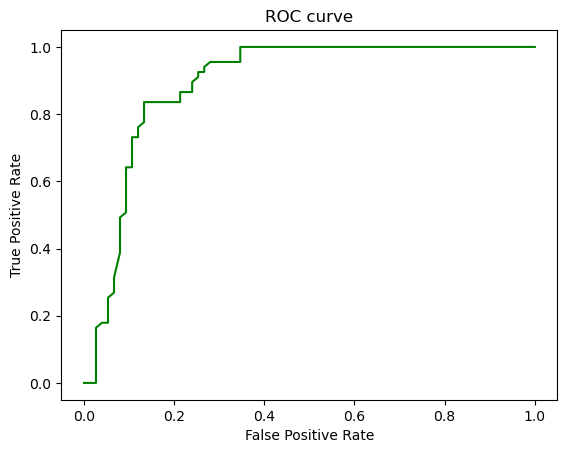

In [51]:
plt.figure()
lw = 2
plt.plot(fpr3, tpr3, color='green') 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()

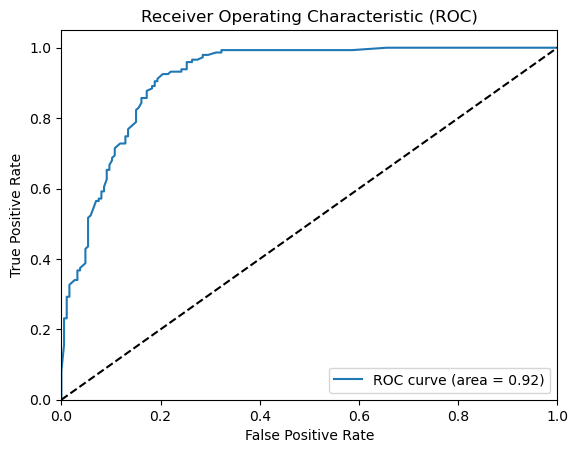

In [52]:
fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [53]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, LGBM_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort( LGBM_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,LGBM_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Judging the model calibration based on the p-value
if p_value < 0.05:
    print("Poor model calibration")
else:
    print("Good model calibration")

Chi-squared: 14.752584657314266
P-value: 0.09796011603922684
Degrees of freedom: 8
Good model calibration


In [54]:
clf_1_list = [
    (best_LGBM, "best_LGBM")
]

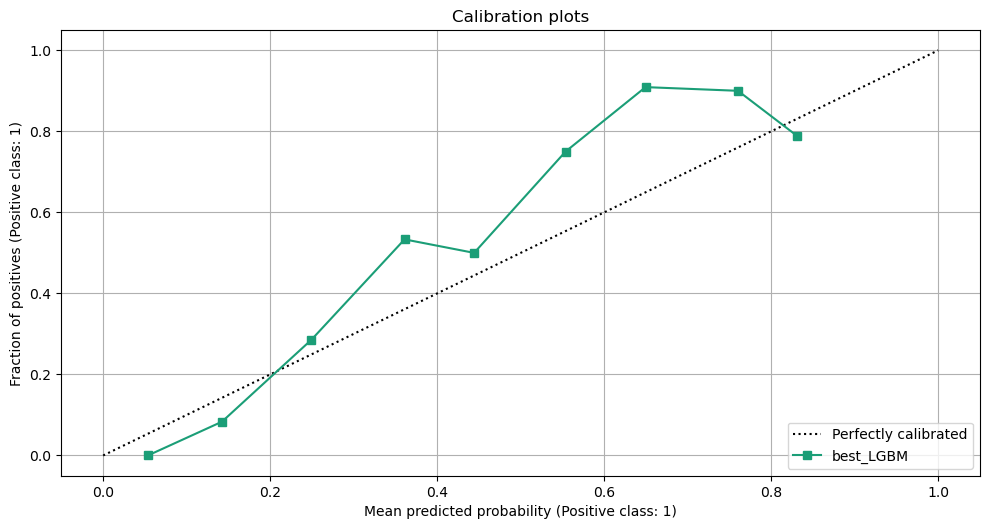

In [55]:
np.random.seed(321)
random.seed(321)

# Create the canvas and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create the subplot for the calibration curve
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are both lists of (classifier, name) tuples

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Show the plot


In [56]:
y_pred =LGBM_y_pred

Model: best_LGBM, Trained model: LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=123, verbose=-1)


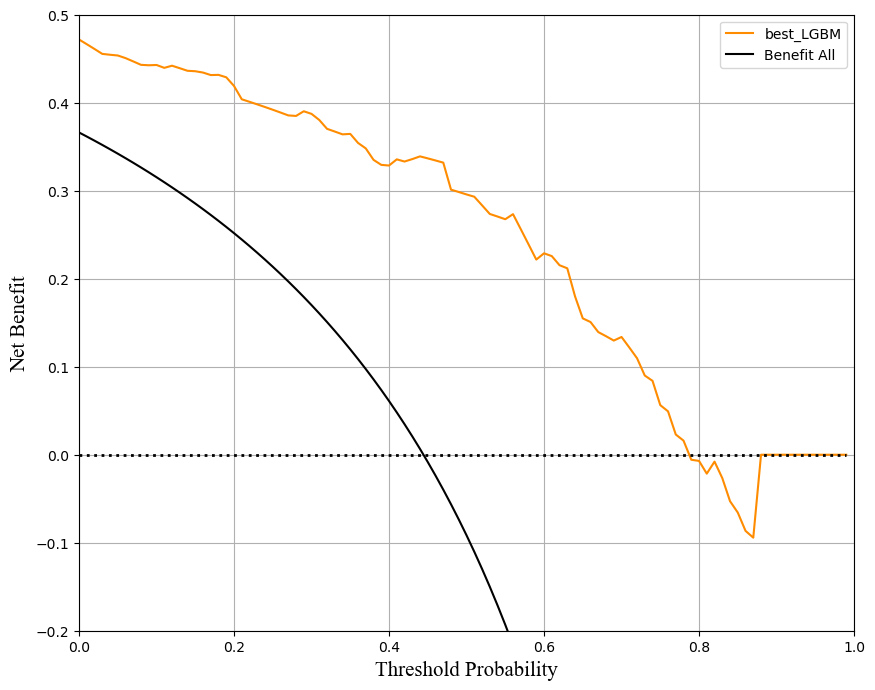

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_LGBM",best_LGBM)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["darkorange", "navy", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

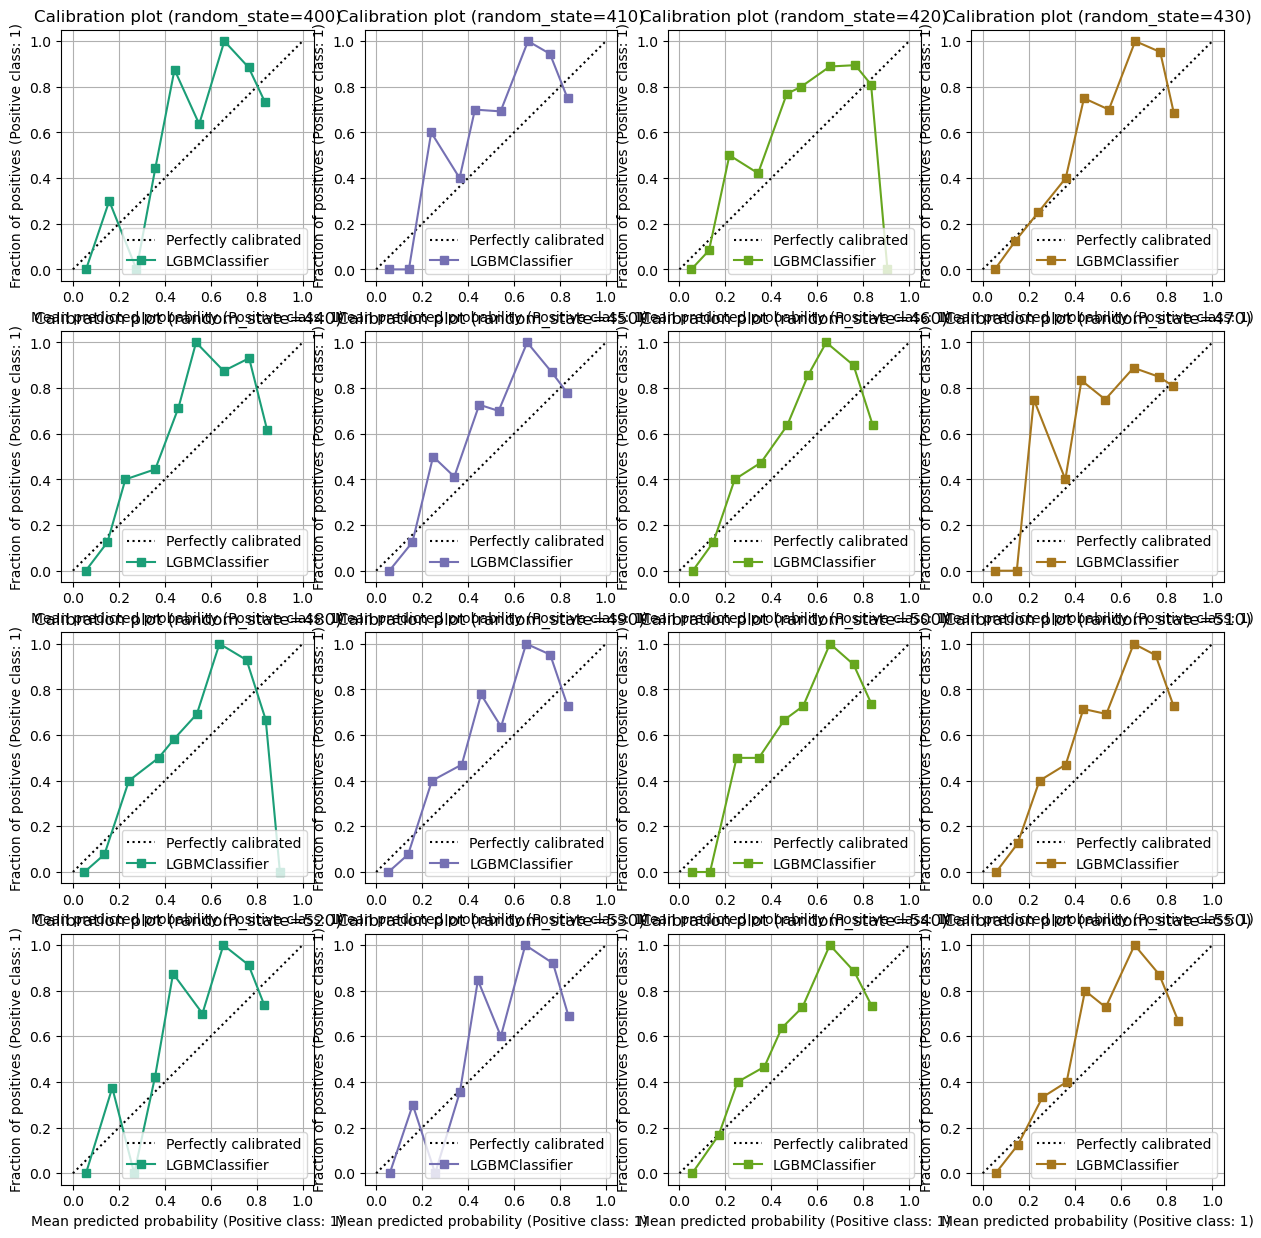

In [58]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Assume train_X, train_y, test_X, test_y are defined
fig = plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
gs = GridSpec(4, 4)  # Reduce the number of rows to 4 to accommodate the range

colors = plt.get_cmap("Dark2")

for idx, n in enumerate(range(400, 650, 10)):  # Adjusted loop bounds
    clf = lgb.LGBMClassifier(random_state=n, verbose=-1)

    param_grid = {
        'lambda_l1': [0.7],
        'lambda_l2': [1e-05],
        'learning_rate': [0.005],
        'n_estimators': [600],
        'max_depth': [4],
        'num_leaves': [12],
        'max_bin': [13],
        'min_data_in_leaf': [32],
        'feature_fraction': [0.9],
        'bagging_fraction': [0.6],
        'bagging_freq': [10],
    }

    grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
    grid_search.fit(train_X, train_y)
    best_params_LGBM = grid_search.best_params_

    clf.set_params(**best_params_LGBM)
    clf.fit(train_X, train_y)

    # Calculate subplot indices based on idx
    row_index = idx // 4
    col_index = idx % 4

    ax_calibration_curve = fig.add_subplot(gs[row_index, col_index])
    ax_calibration_curve.grid()
    ax_calibration_curve.set_title(f"Calibration plot (random_state={n})")

    display = CalibrationDisplay.from_estimator(
        clf,
        test_X,
        test_y,
        n_bins=10,
        ax=ax_calibration_curve,
        color=colors(n % colors.N)
    )

plt.tight_layout()
plt.show()